In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import arch
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [32]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [33]:
tickers = ['^GSPC']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
returns = 100 * data.Close.ffill().pct_change().dropna()
squared_returns = returns ** 2

Text(0.5, 1.0, '^GSPC Returns')

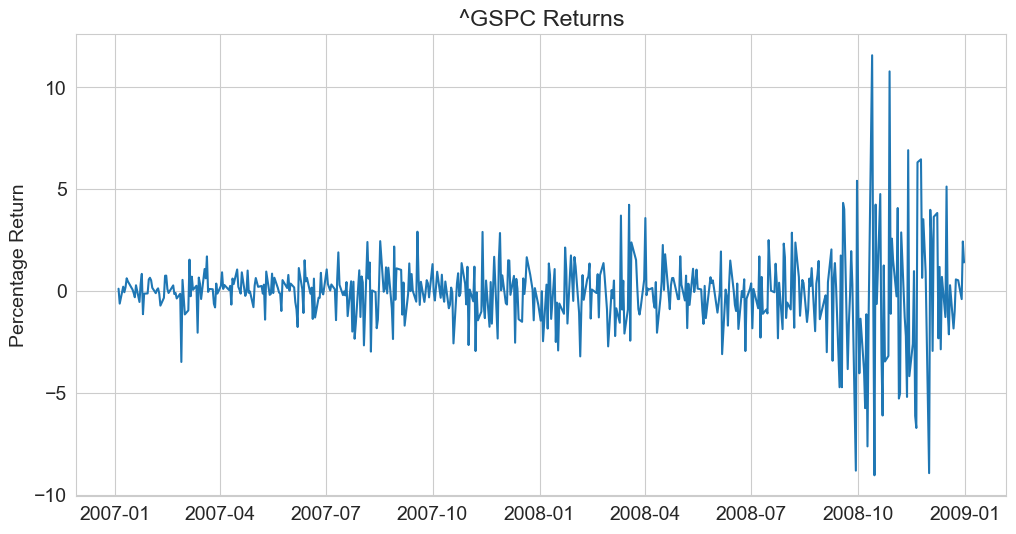

In [35]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.title('^GSPC Returns')

## ACF and PACF (Returns)

In [36]:
# Calculate ACF up to 20 lags for returns
acf_result = sm.tsa.acf(returns, nlags=20)

# Obtain ACF values at specific lags
chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags_1 = [acf_result[lag] for lag in chosen_lags]

# Print ACF values at specific lags
for lag, acf_value in zip(chosen_lags, acf_chosen_lags_1):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: -0.15538068795423646
ACF at lag 5: -0.046085602870854336
ACF at lag 10: 0.03755131965008557
ACF at lag 15: -0.07875751192439588
ACF at lag 20: 0.06424727743473563


In [37]:
# Calculate PACF up to 20 lags for returns
pacf_result = sm.tsa.pacf(returns, nlags=20, method='ols')

pacf_chosen_lags_1 = [pacf_result[lag] for lag in chosen_lags]

# Print PACF values at specific lags
for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags_1):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: -0.15555873595376077
PACF at lag 5: -0.044279836344770285
PACF at lag 10: 0.07952553677869682
PACF at lag 15: -0.1273939380564188
PACF at lag 20: 0.06094974141678442


## ACF and PACF (Squared returns)

In [38]:
# Calculate ACF up to 20 lags for squared returns
acf_result_squared = sm.tsa.acf(squared_returns, nlags=20)

# Obtain ACF values at specific lags
chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags = [acf_result_squared[lag] for lag in chosen_lags]

# Print ACF values at specific lags
for lag, acf_value in zip(chosen_lags, acf_chosen_lags):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: 0.17635400278016594
ACF at lag 5: 0.33673063991006
ACF at lag 10: 0.26780901237206084
ACF at lag 15: 0.18666304144527682
ACF at lag 20: 0.20403181520617722


In [39]:
# Calculate PACF up to 20 lags for squared returns
pacf_result_squared = sm.tsa.pacf(squared_returns, nlags=20, method='ols')

pacf_chosen_lags = [pacf_result_squared[lag] for lag in chosen_lags]

# Print PACF values at specific lags
for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: 0.17636240657807686
PACF at lag 5: 0.2952717916843893
PACF at lag 10: 0.12297083097597475
PACF at lag 15: -0.0560700292465547
PACF at lag 20: 0.009916377761360406


## Ljung Box Q-Test

In [40]:
# Perform the Ljung-Box test on original returns
lb_test_returns = acorr_ljungbox(returns, lags=20)
print('Results for original returns:', lb_test_returns)
print('--------------------------------------------------------')
# Perform the Ljung-Box test on squared returns
lb_test_squared_returns = acorr_ljungbox(squared_returns, lags=20)
print('Results for squared returns:', lb_test_squared_returns)

Results for original returns:       lb_stat     lb_pvalue
1   12.216582  4.736662e-04
2   26.688878  1.601709e-06
3   36.344875  6.330869e-08
4   41.545662  2.071996e-08
5   42.628992  4.393381e-08
6   43.878869  7.812401e-08
7   45.620831  1.035994e-07
8   47.303884  1.341809e-07
9   47.439756  3.249613e-07
10  48.166302  5.787452e-07
11  50.174545  5.822950e-07
12  53.677848  3.119484e-07
13  53.988073  6.077237e-07
14  54.607060  1.011214e-06
15  57.835729  5.917089e-07
16  68.259771  2.009086e-08
17  69.575255  2.551968e-08
18  76.616455  3.326635e-09
19  81.943187  8.579978e-10
20  84.113996  7.778833e-10
--------------------------------------------------------
Results for squared returns:        lb_stat      lb_pvalue
1    15.737157   7.278036e-05
2   100.416155   1.566423e-22
3   108.939382   1.856006e-23
4   153.801559   3.118586e-32
5   211.637165   9.181673e-44
6   258.568664   6.043772e-53
7   314.456534   4.935122e-64
8   330.992485   1.028027e-66
9   379.121044   3.885392e

## ACF and PACF Plots

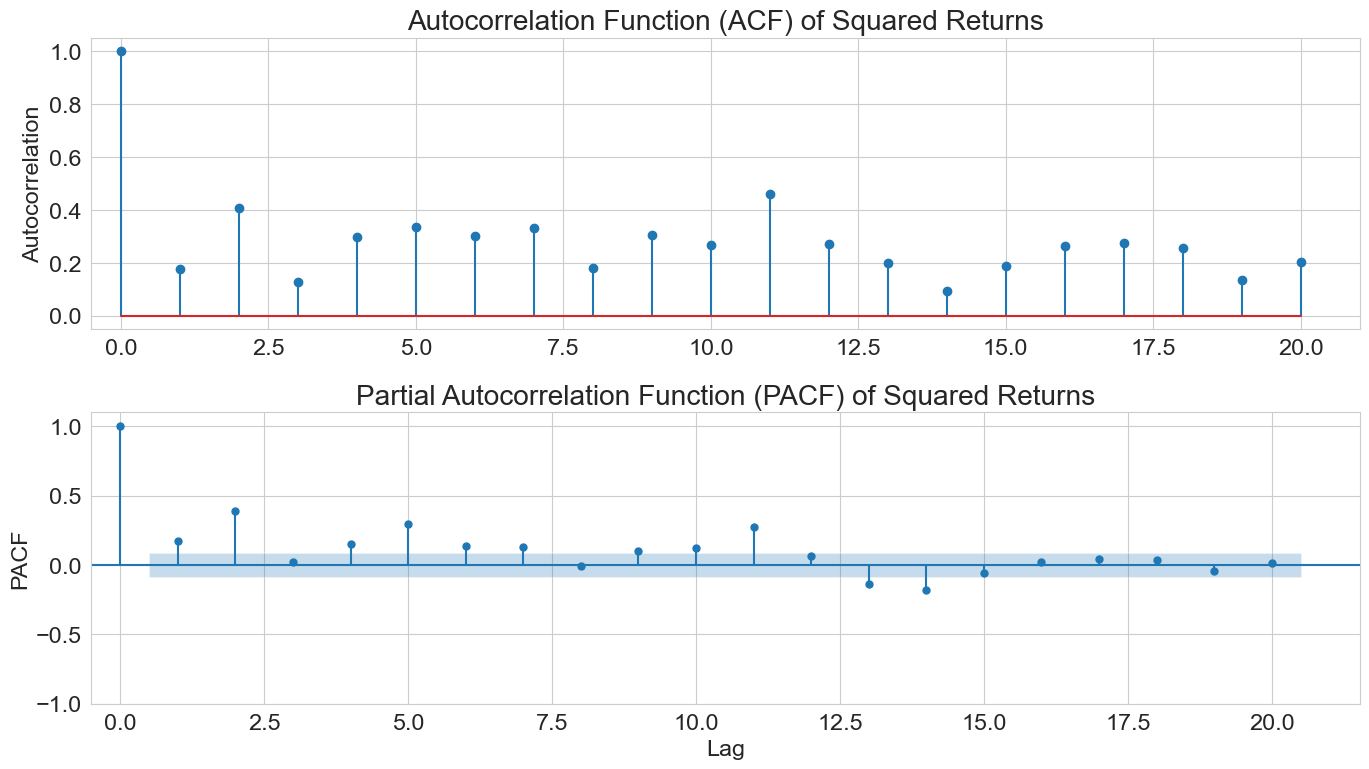

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

#ACF of Squared returns
acf_result = sm.tsa.acf(squared_returns, nlags=20)  # Calculate ACF up to 20 lags
ax[0].stem(range(len(acf_result)), acf_result)
ax[0].set_title('Autocorrelation Function (ACF) of Squared Returns')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_xlim(-0.5)

# PACF of squared returns
plot_pacf(squared_returns, ax=ax[1], lags=20)  # Limit to 20 lags
ax[1].set_title('Partial Autocorrelation Function (PACF) of Squared Returns')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')
ax[1].set_xlim(-0.5)
ax[1].set_ylim(-1, 1.1)

plt.tight_layout()
plt.savefig('GSPC_acf_pacf_figure.png')
plt.show()

## LM ARCH(10) Test on returns and returns squared

In [42]:
# Perform LM ARCH test on returns
model_returns = arch_model(returns, vol='ARCH', mean='Zero')
results_returns = model_returns.fit(disp='off')
lm_test_returns = results_returns.arch_lm_test(lags=10)
print("LM ARCH test on returns:")
print(lm_test_returns)
print("---------------------------")

# Perform LM ARCH test on squared returns
model_squared_returns = arch_model(squared_returns, vol='ARCH', mean='Zero')
results_squared_returns = model_squared_returns.fit(disp='off')
lm_test_squared_returns = results_squared_returns.arch_lm_test(lags=10)
print("LM ARCH test on squared returns:")
print(lm_test_squared_returns)

LM ARCH test on returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 155.5544
P-value: 0.0000
Distributed: chi2(10)
---------------------------
LM ARCH test on squared returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 64.9719
P-value: 0.0000
Distributed: chi2(10)


## Calibration of GARCH(1,1) Models

In [43]:
# Create GARCH-t model
model_t = arch_model(returns, p=1, q=1, vol='Garch', dist='t')
model_n = arch_model(returns, p=1, q=1, vol='Garch')
model_skt = arch_model(returns, p=1, q=1, vol='Garch', dist='skewt')

In [44]:
model_fit_t = model_t.fit()
print("---------------------------------------------------------------------------")
model_fit_n = model_n.fit()
print("---------------------------------------------------------------------------")
model_fit_skt = model_skt.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 40547.781469578
Iteration:      2,   Func. Count:     16,   Neg. LLF: 23559.52230698386
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1023.4060267554743
Iteration:      4,   Func. Count:     32,   Neg. LLF: 869.0062028735285
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1308.5249067066143
Iteration:      6,   Func. Count:     46,   Neg. LLF: 984.0026545885572
Iteration:      7,   Func. Count:     53,   Neg. LLF: 903.8685694474782
Iteration:      8,   Func. Count:     60,   Neg. LLF: 863.1678885317949
Iteration:      9,   Func. Count:     66,   Neg. LLF: 863.0666968227165
Iteration:     10,   Func. Count:     73,   Neg. LLF: 862.6613793878066
Iteration:     11,   Func. Count:     80,   Neg. LLF: 862.5801712488271
Iteration:     12,   Func. Count:     86,   Neg. LLF: 862.5778309896948
Iteration:     13,   Func. Count:     92,   Neg. LLF: 862.5777663679969
Iteration:     14,   Func. Count:     98,   Neg. LLF: 862.577765

In [45]:
print(model_fit_t.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_n.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_skt.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -862.578
Distribution:      Standardized Student's t   AIC:                           1735.16
Method:                  Maximum Likelihood   BIC:                           1756.26
                                              No. Observations:                  503
Date:                      Fri, Mar 15 2024   Df Residuals:                      502
Time:                              19:53:15   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

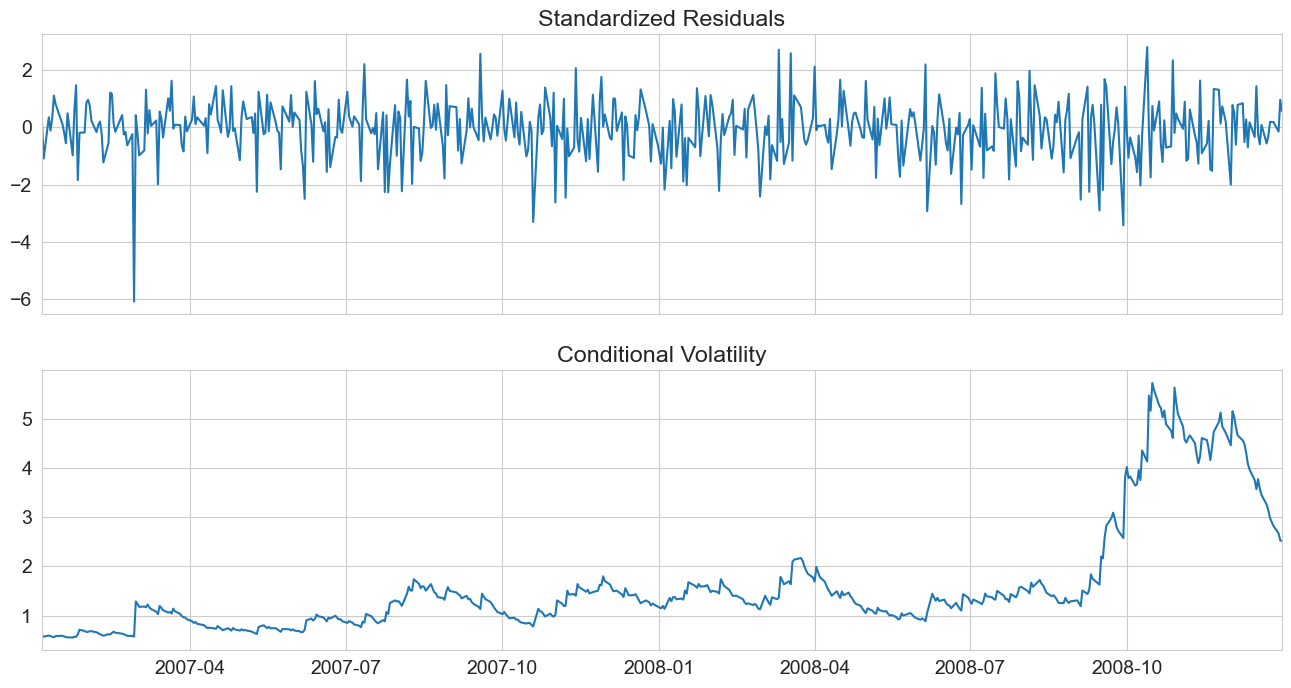

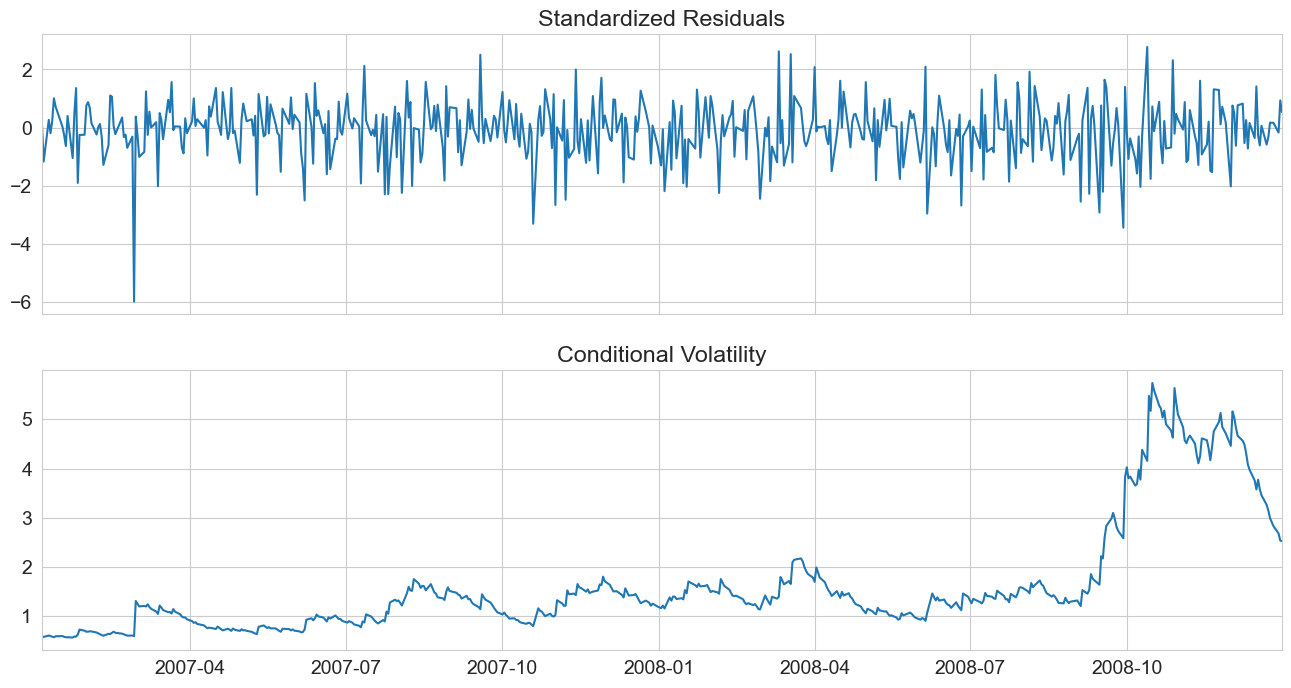

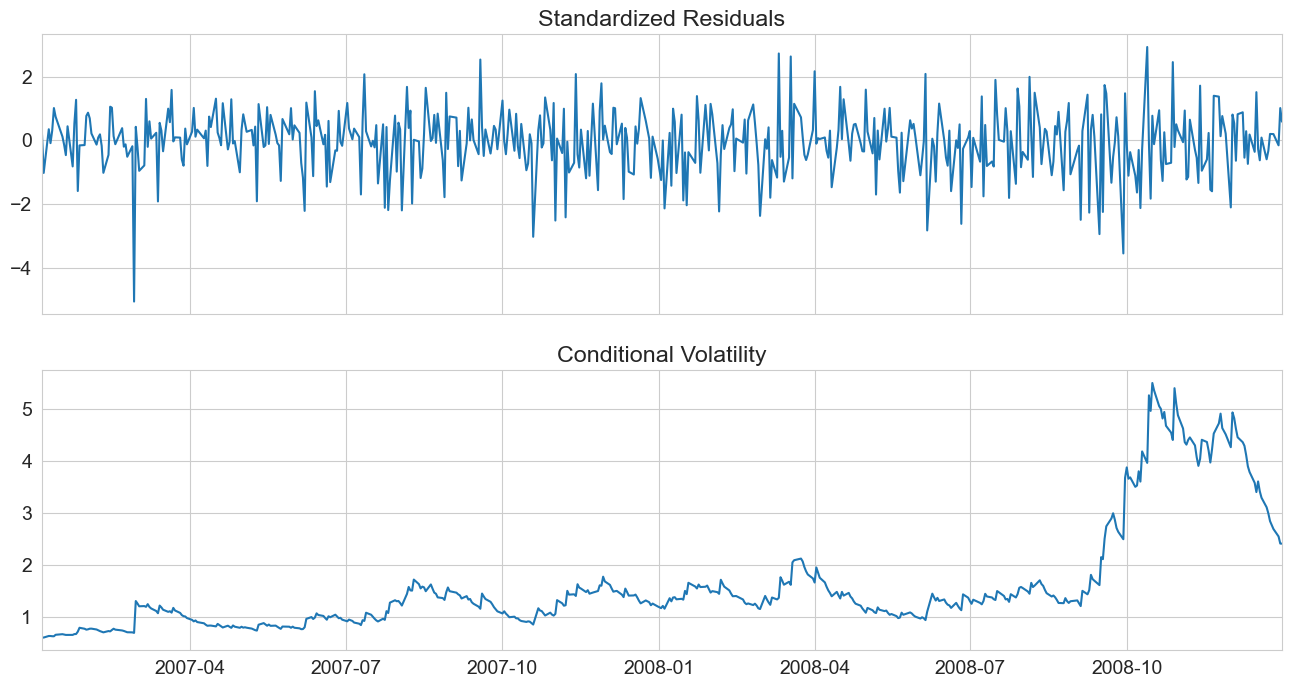

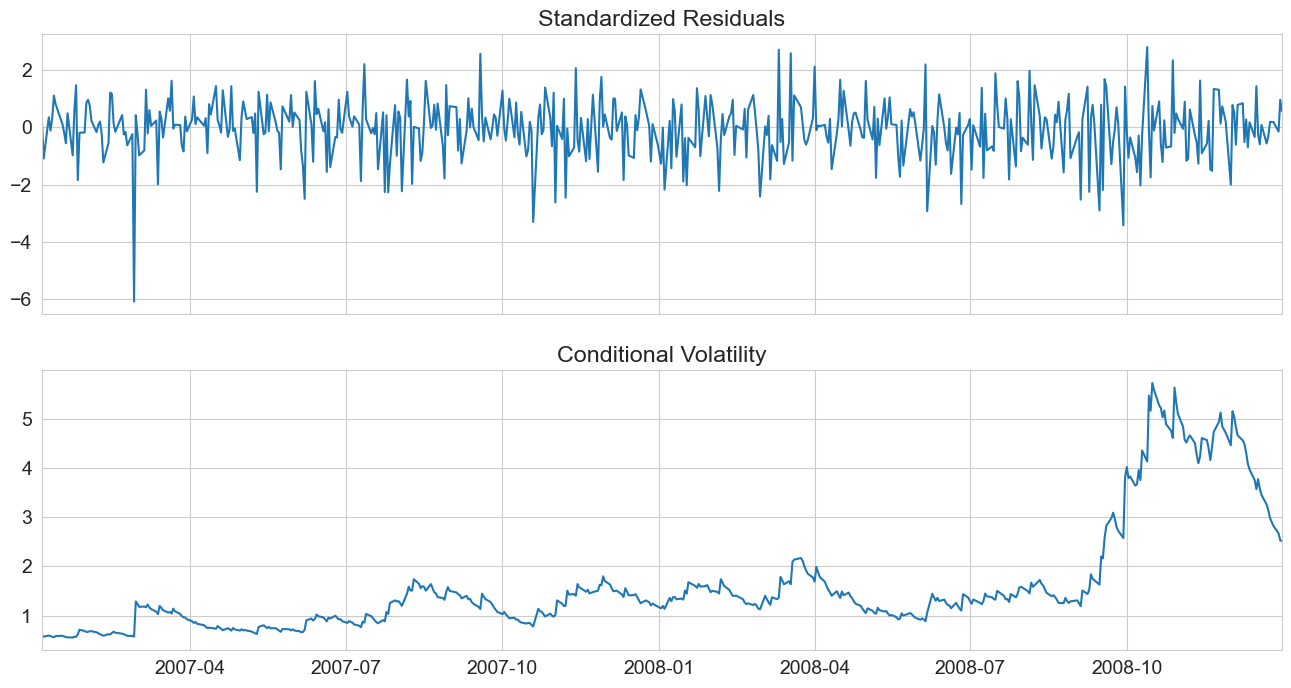

In [46]:
model_fit_t.plot()
model_fit_n.plot()
model_fit_skt.plot()

In [47]:
# Extract standardized residuals from each model fit
std_resid_t = model_fit_t.resid / model_fit_t.conditional_volatility
std_resid_n = model_fit_n.resid / model_fit_n.conditional_volatility
std_resid_skt = model_fit_skt.resid / model_fit_skt.conditional_volatility

# Calculate squared standardized residuals
sqrd_std_resid_t = std_resid_t ** 2
sqrd_std_resid_n = std_resid_n ** 2
sqrd_std_resid_skt = std_resid_skt ** 2

## Box Pierce Test (Lag 20)

### Standardised residuals (t, normal, skewt)

In [48]:
# Perform the Box-Pierce test for 20 lags on each model fit
bp_t = acorr_ljungbox(std_resid_t, lags=20, boxpierce=True)
bp_n = acorr_ljungbox(std_resid_n, lags=20, boxpierce=True)
bp_skt = acorr_ljungbox(std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print("Results:", bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print("Results:", bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print("Results:", bp_skt)

Box-Pierce Test Results (Student t (EHS)):
Results:       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1   11.150437   0.000840  11.084196   0.000871
2   11.439605   0.003280  11.371075   0.003395
3   11.598686   0.008892  11.528581   0.009186
4   11.851517   0.018490  11.778408   0.019077
5   13.241710   0.021216  13.149331   0.022019
6   13.555849   0.035011  13.458493   0.036306
7   13.557507   0.059635  13.460121   0.061660
8   14.172345   0.077382  14.062784   0.080144
9   14.569752   0.103453  14.451535   0.107145
10  20.694922   0.023324  20.431156   0.025429
11  21.224055   0.031123  20.946668   0.033928
12  25.190682   0.013945  24.803329   0.015783
13  25.291206   0.021131  24.900867   0.023786
14  25.308090   0.031645  24.917216   0.035394
15  28.269129   0.019944  27.778577   0.022997
16  28.642533   0.026461  28.138671   0.030434
17  29.281066   0.032021  28.753180   0.036871
18  30.607124   0.031946  30.026722   0.037188
19  31.976524   0.031445  31.339176   0.037043
20  32.1

### Squared standardised Residuals (t, normal, skewt)

In [49]:
# Perform the Box-Pierce test for 20 lags on each model fit
sq_bp_t = acorr_ljungbox(sqrd_std_resid_t, lags=20, boxpierce=True)
sq_bp_n = acorr_ljungbox(sqrd_std_resid_n, lags=20, boxpierce=True)
sq_bp_skt = acorr_ljungbox(sqrd_std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print("Results:", sq_bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print("Results:", sq_bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print("Results:", sq_bp_skt)

Box-Pierce Test Results (Student t (EHS)):
Results:       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    1.905719   0.167440   1.894398   0.168707
2    2.024563   0.363389   2.012301   0.365624
3    2.354264   0.502205   2.338737   0.505141
4    2.527384   0.639739   2.509800   0.642882
5    2.573893   0.765328   2.555665   0.768089
6    2.889285   0.822609   2.866060   0.825460
7    2.899933   0.894102   2.876518   0.896185
8    3.319056   0.912770   3.287342   0.915053
9    3.508855   0.940674   3.473007   0.942564
10   8.877347   0.543782   8.713931   0.559451
11   8.910663   0.630138   8.746389   0.645289
12   9.303185   0.676839   9.128029   0.691958
13   9.677167   0.720096   9.490903   0.734940
14   9.940914   0.766490   9.746294   0.780487
15  10.718198   0.772303  10.497412   0.787341
16  11.032574   0.807470  10.800582   0.821624
17  11.083544   0.852188  10.849634   0.864273
18  11.089142   0.890536  10.855011   0.900408
19  12.108117   0.880952  11.831612   0.892696
20  12.7

## Training Phase (in-sample)

In [50]:
rolling_predictions = []
test_size = 502

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1, dist='t')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:599: RuntimeWarning: divide by zero encountered in log
  lls -= 0.5 * (log(sigma2))
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:600: RuntimeWarning: invalid value encountered in divide
  lls -= ((nu + 1) / 2) * (log(1 + (resids ** 2.0) / (sigma2 * (nu - 2))))
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:600: RuntimeWarning: divide by zero encountered in divide
  lls -= ((nu + 1) / 2) * (log(1 + (resids ** 2.0) / (sigma2 * (nu - 2))))
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:600: R

In [51]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-502:])

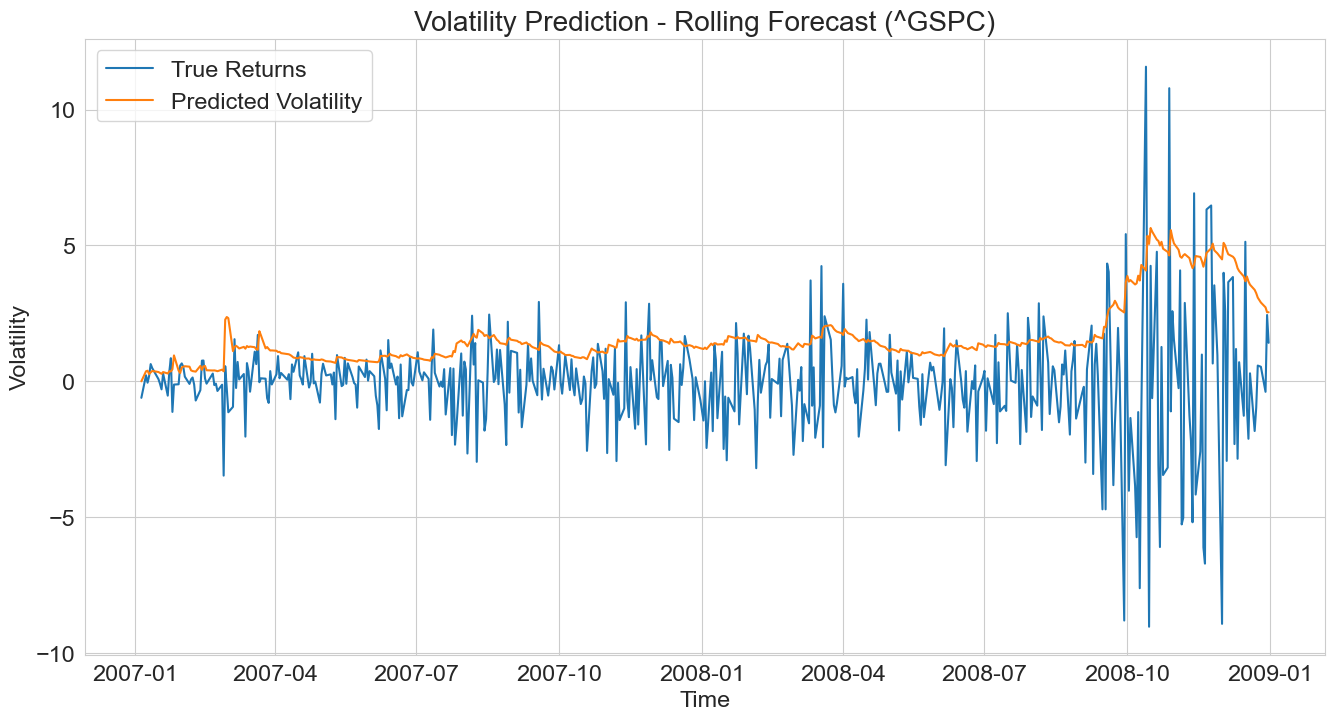

In [52]:
# Set default font size for all text in the plot
plt.rcParams.update({'font.size': 16.8})

true, = plt.plot(returns[-502:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast (^GSPC)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility'])
plt.savefig('Volatility_Comparison_GSPC.png')

# Testing Phase (Out of Sample)

In [53]:
tickers = '^GSPC'
oos_start_date = '2009-01-01'
oos_end_date = '2011-01-01'
oos_data = yf.download(tickers, start=oos_start_date, end=oos_end_date)

[*********************100%%**********************]  1 of 1 completed


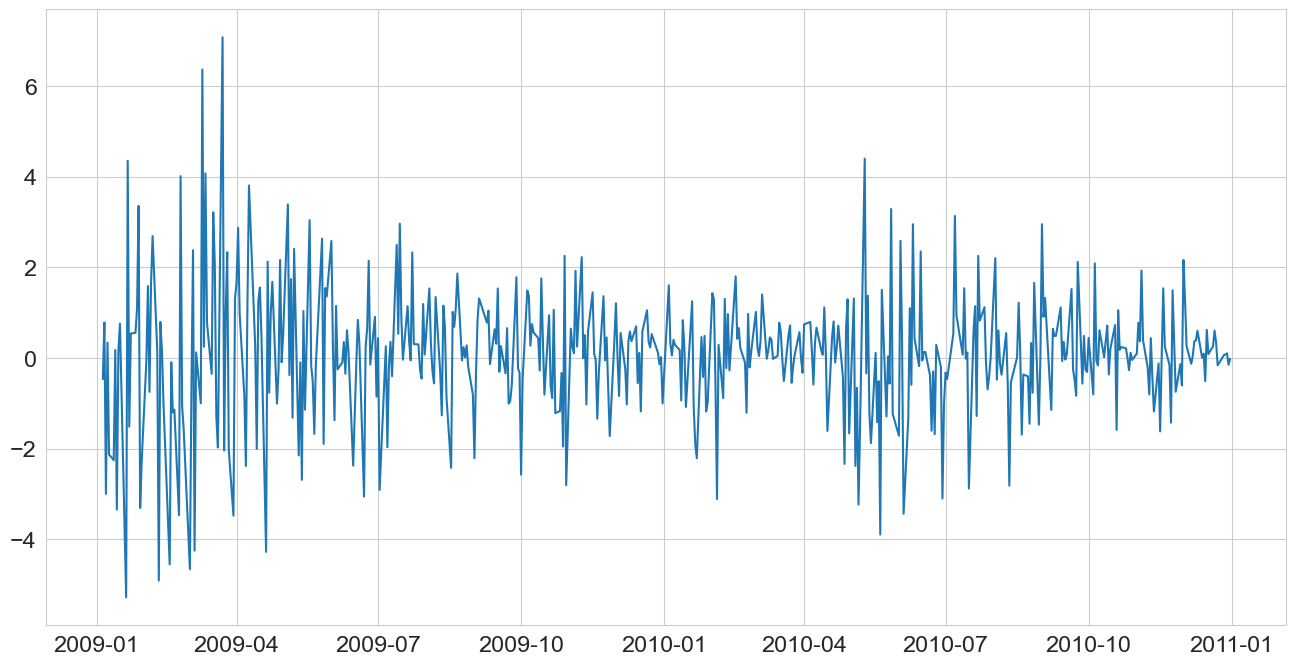

In [54]:
oos_returns = 100 * oos_data['Close'].ffill().pct_change().dropna()
plt.plot(oos_returns)

In [55]:
oos_rolling_predictions = []

for i in range(len(oos_returns)):
    test = oos_returns[:i]
    if len(test) > 1:  
        test = test.dropna()  
        model = arch_model(test, p=1, q=1, dist='t')
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        oos_rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))
    else:
        oos_rolling_predictions.append(np.nan)  

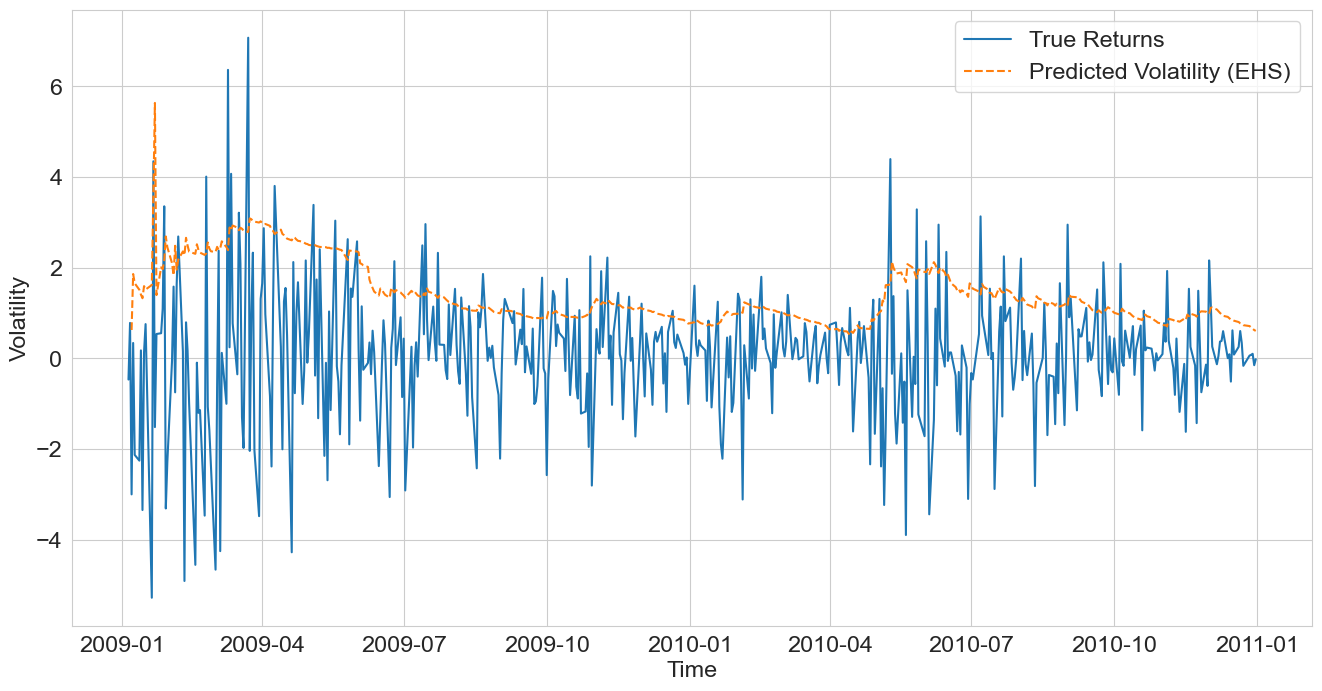

In [56]:
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_returns[-len(oos_rolling_predictions):])
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_rolling_predictions, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility (EHS)'])
plt.savefig('OOS_Rolling_Window_GSPC.png')
plt.show()